<a href="https://colab.research.google.com/github/GuysBarash/MLBook/blob/main/ex_4_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

%matplotlib inline
import matplotlib.pyplot as plt

# Define the function to predict

In [86]:
class F_class:
    def __init__(self, a, A, B):
        self.a = a
        self.A = A
        self.B = B

    def calc(self, x):
        res = np.zeros(x.shape)

        bigger_idx = x > self.a
        smaller_idx = x <= self.a

        res[bigger_idx] = np.power(x[bigger_idx], 2) * self.A
        res[smaller_idx] = np.power(x[smaller_idx], 2) * self.B

        return res

# The nature-given parameters

In [87]:
a = 0
A = 1
B = -1

The dataset D

In [88]:
f = F_class(a, A, B)
X = np.arange(-5, 5)
Y = f.calc(X)
D = pd.DataFrame(columns=['X', 'Y'], data=np.array([X, Y]).T)

In [89]:
D

,X,Y
0,-5.0,-25.0
1,-4.0,-16.0
2,-3.0,-9.0
3,-2.0,-4.0
4,-1.0,-1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,4.0
8,3.0,9.0
9,4.0,16.0


# ML

In [90]:
def sum_of_squares(params, X, Y):
  a, A, B = params
  model = F_class(a, A, B)
  y_pred = model.calc(X)
  obj = np.sqrt(((y_pred - Y) ** 2).sum())
  return obj

In [91]:
# perform fit to find optimal parameters
# initial value is a guess
initial_guess = [0., 0., 0.]  # a, A, B
res = minimize(sum_of_squares, x0=initial_guess, args=(X, Y), tol=1e-5, method="Powell")

# ML evaluation

In [92]:
a_pred, A_pred, B_pred = res.x
model = F_class(a_pred, A_pred, B_pred)
Y_pred = model.calc(X)
MSE = np.sqrt(((Y_pred - Y) ** 2).sum())

In [93]:
print("Estimated values:")
print(f"a = {a_pred:>.3f}")
print(f"A = {A_pred:>.3f}")
print(f"B = {B_pred:>.3f}")
print(f"MSE: {MSE}")

Estimated values:
a = 0.990
A = 1.000
B = -1.000
MSE: 7.472741870478288e-11


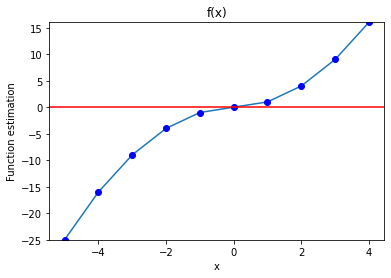

In [94]:
plt.plot(X, Y)
plt.plot(X, Y_pred,  'bo')
plt.ylim(min(Y), max(Y))
plt.xlabel('x')
plt.ylabel('Function estimation')
plt.axhline(y=a, color='r', linestyle='-')
plt.title('f(x)')
plt.show()